# CS422 - Homework #1
-----------------------------------------------------------------------------------------------------------------------------
## By: Laura Pereda

## Recitation Problems

### Chapter 1:
#### Exercise 1 - Discuss whether each of the following are data mining tasks:
* A. No, simply divinding customers based on a characteristic is not data mining. It's just querying.
* B. No. Again, dividing customers based on a characteristic isn't data mining, but querying.
* C. No, computing sales seems more like accounting than data mining.
* D. No, this follows more towards querying in a specific order than data mining.
* E. No, since the dice is fair data mining would not be useful here. Probability analysis or statistics seems more like it.
* F. Yes, creating models based on previous data follows along the lines of a data mining task.
* G. Yes, a model could be created to follow normal heart rate and use past info to determine abnormal heart rates.
* H. Yes, creating models on past seismic waves associated with earthquakes.
* I. No, this is just extraction, which is not enough to make this a data mining task.

### Chapter 2:
#### Exercise 2 - Classifying attributes as binary, discrete, or continuous. In addition, classify as either qualitative (nominal or ordinal) or quantitative (interval or ratio). 
* A. Binary; Quantitative, Ordinal
* B. Continuous; Quantitative, Ratio
* C. Discrete; Qualitative, Ordinal Ex. You can't really cut up people's opinions into parts nor does a unit of measurement exist to measure them. Most simple responses would fall under "good, better, best". Just enough to have some order.
* D. Continuous; Quantitative, Ratio
* E. Discrete; Qualitative, Ordinal
* F. Continuous; Quantitative, Interval Ex. The height above sea lvl is always changing but it can be measured. 
* G. Discrete; Quantitative, Ratio
* H. Discrete; Qualitative, Nominal
* I. Discrete; Qualitative, Ordinal
* J. Discrete; Qualitative, Ordinal
* K. Continuous; Quantitative, Interval Ex. Distance always changing, can be measure, not sure about dividing/multiplying
* L. Discrete; Quantitative, Interval Ex. Density is within a measurement.
* M. Discrete; Qualitative, Nominal

#### Exercise 7 - Which of the following quantities is likely to show more temporal autocorrelation: daily rainfall or daily temperature? Why?
    Tricky question, but seeing as I live within an area that temperature is categorized within four seasons, with each season having its own set of temperature changes, I would say daily temperature best represents temporal autocorrelation. Daily rainfall can be inconsistent throughout some seasons, sometimes not even showing at all. The location of the area also determines the amount of rainfall. Daily temperature just seems more reliable. 
    
#### Exercise 15 - Given a set of _m_ objects that is divided into _k_ groups of size **m i**. If the goal is to obtain a sample of size n < m, what is the difference between the following two sampling schemes? Assume sampling with replacement
    The first scheme represents **stratified sampling** where there are prespecified groups of objects and we take an equal number of objects from each group. There is a variation in where we take a number proportional to the size of that particular group. The second scheme represents a simple random sampling where each object has the same probability of being selected, especially since we assume the sampling is with replacement. Sampling only works if it is a good representation of the original data set. While simple random sampling with replacement makes it easier to analyze because the probability remains the same for each object, if these m objects are different types that it will fail to represent those types of objects that are less frequent. Stratified sampling is able to cover that. 
    
#### Exercise 16 - Talks about the inverse document frequency transformation.
* A. What is the effect of this transformation if a term occurs in one document? In every document?
    
    If the term appears in one document then it will have the maximum weight of 1, which would indicate the term uniquness. If the term appears in every document, it would have the lowest weight of 0, which would indicate its lack of uniqueness. 
    
    
* B. What might be the purpose of this transformation?
    
    In information retrieval, eliminating the "noise" as used in data mining is very important to create efficiency and improve the time to retrieve results. This transformation will help with eliminating stop words, i.e the, a, in, is, etc.
    
#### Exercise 17 - Apply square root transformation to a ratio attribute x to obtain a new attribute x*. As part of analysis, you identify an interval (a, b) in which x* has a linear relationship to another attribute y.
* A. What is the corresponding interval (a, b) in terms of x?

     (a^2, b^2 )
     
* B. Give an equation that relates y to x. 

    y = x^2
    
#### Exercise 18 - Compares and contrast some similarity and distance measures.
* A. x = 0101010001 & y = 0100011000 

    Hamming distance = 3
    Jaccard similarity = f(11)/ (f(10) + f(10) + f(11)) = 2/5
    
* B. Which approach (Jaccard or Hamming distance) is similar to Simple Matching Coefficient and which is more simiar to cosine measure?

    The Hamming distance is similar to the SMC. The SMC is defined as "the number of matching attribute values"/"number of attributes". It measure the similarity of objects while the hamming distance measures differences. Opposites but similar principles.

## Practicum Problems
### Problem 1 - Titanic Database

In [133]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.impute import SimpleImputer

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

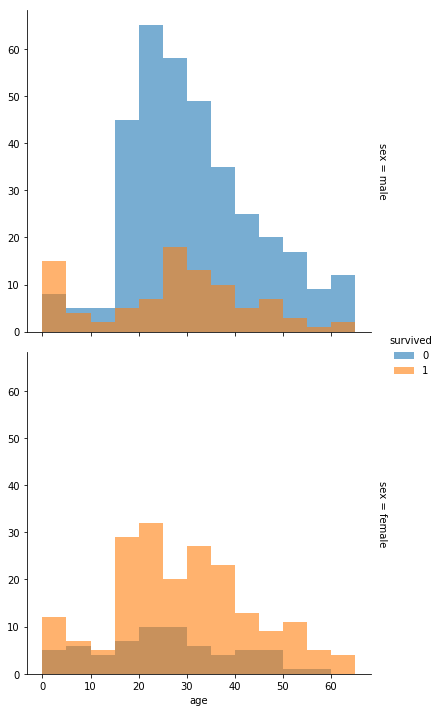

In [70]:
titanic_ds = sns.load_dataset("titanic")
bins = np.arange(0, 70, 5)
g = sns.FacetGrid(titanic_ds, row="sex", hue="survived", margin_titles=True, height=5, aspect=1.1)
g.map(sns.distplot, 'age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show()

From above, the relationship between age and gender shows more women survived vs men. For a man to survive, he would had to have been below the age of 10. In this case, the results do make sense since within the evacuation procedure, women and children were prioritized before men. As unfortunate as that it, the result from this histogram follow along those lines. 

### Problem 2 - Auto MPG Dataset

In [125]:
import os

autompg_ds = pd.read_csv('auto-mpg.csv', na_values=["?"])
autompg_ds = autompg_ds.drop(columns='name')

Demonstrate variance with missing values in horsepower:

In [105]:
autompg_ds.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1481.569393
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

Demonstrate variance with mean replacing the missing values in horsepower:

In [118]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(autompg_ds)
autompg_ds[autompg_ds.columns] = imp_mean.fit_transform(autompg_ds)
# autompg_ds['horsepower'].values.tolist() //Check to see if NaN was replaced

In [115]:
autompg_ds.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1459.177916
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

Demonstrate variance with median replacing the missing values in horsepower:

In [121]:
autompg_ds2 = pd.read_csv('auto-mpg.csv', na_values=["?"])
autompg_ds2 = autompg_ds2.drop(columns='name')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(autompg_ds2)
autompg_ds2[autompg_ds2.columns] = imp_mean.fit_transform(autompg_ds2)
# autompg_ds2['horsepower'].values.tolist() //Check to see if NaN was replaced

In [122]:
autompg_ds2.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1460.969052
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

Demonstrate variance with mode replacing the missing values in horsepower:

In [123]:
autompg_ds3 = pd.read_csv('auto-mpg.csv', na_values=["?"])
autompg_ds3 = autompg_ds3.drop(columns='name')
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(autompg_ds3)
autompg_ds2[autompg_ds3.columns] = imp_mean.fit_transform(autompg_ds3)
# autompg_ds2['horsepower'].values.tolist() //Check to see if NaN was replaced

In [124]:
autompg_ds3.var()

mpg                 61.089611
cylinders            2.893415
displacement     10872.199152
horsepower        1481.569393
weight          717140.990526
acceleration         7.604848
model_year          13.672443
origin               0.643292
dtype: float64

--------------------------------------------------------------------------------------
* Original: 1481.569393
* Mean:     1459.177916
* Median:   1460.969052
* Mode:     1481.569393

The mean imputation resulted in the lowest variance. SThis is because we are replacing the missing values with the mean. As the data becomes to take on the average, the variability of the data will decrease to 0 and thus not capture the actual data. On the otherhand, it seems the mode was able to maintain the original variance of the data, thus I would utilize the mode more often to replace any missing data.

### Problem 3 - Iris Dataset

In [153]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

from sklearn import decomposition
pca = decomposition.PCA(n_components=4)
pca.fit(iris_df.iloc[:,0:4])
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [144]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

Calculate the percentage of variance to the original features:

In [151]:
total_var =  0.685694 + 0.189979 + 3.116278 + 0.581006
sepal_var = (0.685694/total_var)*100
print(sepal_var)

14.994542918291165
